# Project 3- Rosie Faccone

In this project, we performed classification on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

### Load and prepare dataset

In [2]:
# load the admissions.csv file found in ../../project-2/assets/
df = pd.read_csv("../../project-2/assets/admissions.csv")
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [3]:
# use shape and describe to see if any rows are missing values
df.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [4]:
# fill in any missing values for gre or gpa with the means of those columns respectively
df.gre.fillna(df.gre.mean(), inplace=True)
df.gpa.fillna(df.gpa.mean(),  inplace=True)

In [5]:
# fill in missing values for prestige with value which occurs the most
# hint: use .value_counts()
df.prestige.value_counts()

2.0    150
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [6]:
df.prestige.fillna(2.0, inplace=True)

In [7]:
# change dtpyes of gre and prestige to int and gpa to float
df.gre = df.gre.astype(int)
df.gpa = df.gpa.astype(float)
df.prestige = df.prestige.astype(int)

In [8]:
# use count again to check that you have no missing values
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.040000,3.390930,2.48500
std,0.466087,115.338353,0.379675,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.390930,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


### Add dummy variables

In [9]:
# create and add dummy variables for prestige using the prefix 'prestige'
# drop the prestige_4 column (Recall: why are we dropping this column?)
dum= pd.get_dummies(df.prestige, prefix='prestige')
dum.drop('prestige_4', axis=1, inplace=True)
dum.head()

,prestige_1,prestige_2,prestige_3
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [10]:
df= df.join(dum)
df.head()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3
0,0,380,3.61,3,0.0,0.0,1.0
1,1,660,3.67,3,0.0,0.0,1.0
2,1,800,4.00,1,1.0,0.0,0.0
3,1,640,3.19,4,0.0,0.0,0.0
4,0,520,2.93,4,0.0,0.0,0.0


### Classification with Logistic Regression 

In [11]:
# use these features for classification
X = df[['gre','gpa','prestige_1','prestige_2','prestige_3']]
y=df.admit


In [12]:
# using k-fold cross-validation with k = 10
# calculate mean test set accuracy of LogisticRegression using all features to predict admit
kf = KFold(len(df), n_folds= 10, shuffle=True)
scores=[]
for train_idx, test_idx in kf:
    model=LogisticRegression()
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    score= model.score(X.iloc[test_idx], y.iloc[test_idx])
    scores.append(score)

print np.mean(scores)   

0.6925


### Classification with KNN

In [13]:
# use grid search to select the best fit k for k Nearest Neighbor
# use kNN with neighbors weighted by distance (weights='distance')
# search through a grid from k = 3 to 99 at intervals of 2
# again use 10-fold crossvalidation
# hint: use GridSearchCV

parameter = range(3, 100, 2)
params = {'n_neighbors': parameter }
kf = KFold(len(df), n_folds= 10, shuffle=True)
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(X, y)
gs.grid_scores_

[mean: 0.65750, std: 0.08591, params: {'n_neighbors': 3},
 mean: 0.67000, std: 0.07228, params: {'n_neighbors': 5},
 mean: 0.68000, std: 0.07730, params: {'n_neighbors': 7},
 mean: 0.68500, std: 0.07176, params: {'n_neighbors': 9},
 mean: 0.67250, std: 0.08548, params: {'n_neighbors': 11},
 mean: 0.69250, std: 0.08370, params: {'n_neighbors': 13},
 mean: 0.67500, std: 0.08139, params: {'n_neighbors': 15},
 mean: 0.67500, std: 0.07984, params: {'n_neighbors': 17},
 mean: 0.66750, std: 0.08807, params: {'n_neighbors': 19},
 mean: 0.66500, std: 0.09028, params: {'n_neighbors': 21},
 mean: 0.67500, std: 0.08588, params: {'n_neighbors': 23},
 mean: 0.67750, std: 0.07862, params: {'n_neighbors': 25},
 mean: 0.67500, std: 0.08292, params: {'n_neighbors': 27},
 mean: 0.68250, std: 0.08066, params: {'n_neighbors': 29},
 mean: 0.68000, std: 0.08124, params: {'n_neighbors': 31},
 mean: 0.67750, std: 0.08548, params: {'n_neighbors': 33},
 mean: 0.67000, std: 0.07566, params: {'n_neighbors': 35},
 

In [14]:
# print out best parameter setting found
gs.best_params_

{'n_neighbors': 13}

In [15]:
# print out the best score
gs.best_score_


0.6925

### Compare classifiers

In [16]:
# Retrain both classifiers (logistic regression and kNN using best parameter found) on the full dataset
lr =LogisticRegression()
lr.fit(X, y)

knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [17]:
from sklearn import metrics

In [18]:
# for the entire set of observations, get the probablity of class 1 (P(y=1 | x)) for both models
prob_lr= lr.predict_proba(X)[:,1]
prob_knn= knn.predict_proba(X)[:,1]

In [19]:
# print AUC for both classifiers
print metrics.roc_auc_score(y, prob_lr)

print metrics.roc_auc_score(y, prob_knn)


0.669608606616
0.720097487814


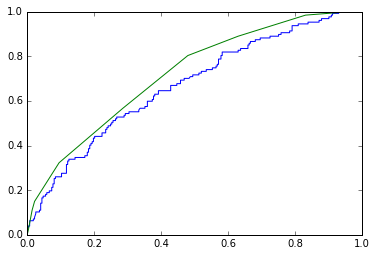

In [20]:
# plot a ROC curve for both classifiers on the same plot
# does this match expectations from the AUC values?
fpr_lr, tpr_lr, thresh_lr= roc_curve(y, prob_lr)
fpr_knn, tpr_knn, thresh_knn= roc_curve(y, prob_knn)

# add code here to plot roc curve
plt.figure()
ax= plt.plot(fpr_lr, tpr_lr) #blue line
ax= plt.plot(fpr_knn, tpr_knn) #green line 

#### Why is one model performing so much better than the other?
#### What is likely happening?

Answer: When running both clasifiers on the same training data, it seems that KNN performs significantly better. This is likely due to that estimator overfitting the available data- exacerbated by the fact that we are training and testing on the same set. 

To get a clearer answer on which model is performing better, it would be wiser to split the data into test and train sets. 


## Bonus

In [21]:
# Create a train/test split of the data
# Retrain both models using the training set
# How do the AUC values change when only using P(y=1|x) on the test set?


In [22]:
df.describe()

,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,0.317500,588.040000,3.390930,2.48500,0.152500,0.377500,0.302500
std,0.466087,115.338353,0.379675,0.94446,0.359955,0.485369,0.459916
min,0.000000,220.000000,2.260000,1.00000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,2.00000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.390930,2.00000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,3.00000,0.000000,1.000000,1.000000
max,1.000000,800.000000,4.000000,4.00000,1.000000,1.000000,1.000000


In [23]:
train=df[:300]
test= df[300:]

In [24]:
X_train = train[['gre','gpa','prestige_1','prestige_2','prestige_3']]
y_train = train.admit
X_test= test[['gre','gpa','prestige_1','prestige_2','prestige_3']]
y_test= test.admit

In [25]:
# Retrain both classifiers (logistic regression and kNN using best parameter found) on the full dataset
lr =LogisticRegression()
lr.fit(X_train, y_train)

knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [26]:
prob_lr= lr.predict_proba(X_test)[:,1]
prob_knn= knn.predict_proba(X_test)[:,1]

In [27]:
# print AUC for both classifiers
print metrics.roc_auc_score(y_test, prob_lr)

print metrics.roc_auc_score(y_test, prob_knn)


0.573626373626
0.567032967033


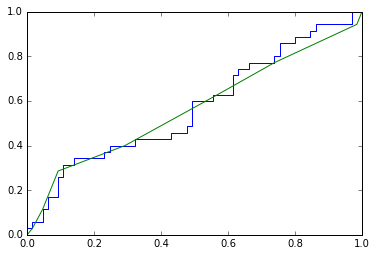

In [28]:
fpr_lr, tpr_lr, thresh_lr= roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn= roc_curve(y_test, prob_knn)

# add code here to plot roc curve
plt.figure()
ax=  plt.plot(fpr_lr, tpr_lr) #blue line
ax= plt.plot(fpr_knn, tpr_knn) #green line 

This time it seems the logistical regression model is working slightly better. This time, the AUC scores for the two models are much less distant from eachother than they were earlier when we testing on our training data set. This indicates we may have gotten rid of the overfitting, or whatever else may have been going on earlier. 


We are still seeing the same chatacteristics of having
a jagged line for the logistic regression ROC line, and a much smoother one for the KNN ROC plot. 
